In [6]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [7]:
from wordcloud import WordCloud
from PIL import Image# ÎßàÏä§ÌÇπ Îç∞Ïù¥ÌÑ∞Î•º ÎΩëÏïÑÎÇ¥Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨.
from wordcloud import STOPWORDS # Î∂àÏö©Ïñ¥
import nltk # ÌòïÌÉúÏÜåÎ∂ÑÏÑù
from konlpy.tag import Twitter 
t = Twitter()

In [8]:
# ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î¶¨Î∑∞Í∞Ä Ï†ÄÏû•Îêú ÌååÏùºÏùÑ ÏùΩÎäîÎã§.
review = open('./review.txt', encoding='utf-8').read()
review

'ÎπÑÏÉÅÍ∏à Ï£ºÏãù ÎïåÎ†§ÎÑ£Í≥† ÎßòÍ≥†ÏÉùÌïòÍ∏∞\nÎßòÍ≥†ÏÉùÌïòÎ©¥,,, Ïä§Ìä∏Î†àÏä§Î°ú Îπ†ÏßÄÍ∏¥ Îπ†Ïßê„Öã\nÎÇ®Ìé∏Ïù¥Îûë 3Í∞úÏõî ÎÅäÏñ¥ÎÜìÍ≥† ÌïúÎ≤àÎèÑ ÏïàÍ∞ê„Öã„Öã„Öã„Öã„Öã„Öã\nÏà†ÎÅäÍ≥†, ÏïºÏãù ÎÅäÍ≥†, ÎùºÎ©¥ ÎÅäÍ≥† Í∞ÑÏãù ÎÅäÍ≥† Î∞• Î∞òÍ≥µÍ∏∞Î°ú Ï§ÑÏù¥Í≥† ÏÇºÏãú ÏÑ∏ÎÅº Íº¨Î∞ïÍº¨Î∞ï Ï±ôÍ≤®Î®πÏúºÎ©¥ÏÑú 2ÎÖÑÎèôÏïà ÏïûÏûêÎ¶¨Ïàò Îëê Î≤à Î∞îÍø®ÎäîÎç∞Ïöî. ÏßÄÍ∏àÏùÄ Ïà†ÎèÑ Í∞ÄÎÅî ÎßàÏãúÍ≥† Î®πÍ≥† Ïã∂ÏùÄ Í±∞ÎèÑ Î®πÍ≥† ÏÇºÏãú ÏÑ∏ÎÅº Íº¨Î∞ï Ï±ôÍ≤®Î®πÎäî Í±¥ ÏïÑÎãàÏßÄÎßå Ïú†ÏßÄÌïòÎ†§Í≥† ÎÖ∏Î†•Ï§ëÏûÖÎãàÎãπ. Í∑∏ÎûòÎèÑ ÏïºÏãù Ïïà Î®πÏñ¥Ïö©, ÌèâÏÉùÌïòÎäî Í±∞Îùº ÏÉùÍ∞ÅÌïòÏãúÎäî Í≤å Ï†§ Ï¢ãÏïÑÏó¨...ÎòêÎ•¥Î•¥ÎÇ¥ÏùºÎ∂ÄÌÑ∞ ÌïòÏûêÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ ÎßùÌïòÎäî ÏßÄÎ¶ÑÍ∏∏ÏûÑÎã§„Ö†„Ö† \n„Öã„Öã„Öã\nÌäÄÍπÄÏóê ÏûàÎäî ÌÉÑÏàòÌôîÎ¨ºÏùÄÏöî...?\nÏ†ÅÎãπÌûà Ìï¥Ïöî „Öã„Öã„Öã„Öã„Öã„Öã„Öã\nÌÇπÏû•Í∞ìÏãúÍ≤Ω\nÌòÑÏã§: 1Ïª∑\n???: Î¨ºÎßå Î®πÏóàÎäîÎç∞....(Î¨¥ÏóáÏùÑ Î¨ºÏ≤òÎüº Î®πÏñ¥ ÏπòÏõ†ÎäîÏßÄ ÏÉùÍ∞ÅÌï¥ Î≥¥ÏãúÏò§.)\nÎÇòÏÅúÎÜàÏù¥ÎÑ§,,, Ïã†ÎûëÏù¥ Ï†ÄÎ†áÍ≤å ÎπºÎ©¥ Ïã†Î∂ÄÍ∞Ä Î¨ªÌûåÎã§Í∑ú„Ö†„Ö†„Ö†\nÏÇ¥Ïñ¥ÎñªÍ≤å ÎπºÏöî? Ï≤≠Ï≤©Ïû• ÎÇòÎà†Ï£º

In [9]:
# ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ Ïã§ÌñâÌïúÎã§.
review_tokens = t.nouns(review)
review_tokens

['ÎπÑÏÉÅ',
 'Í∏à',
 'Ï£ºÏãù',
 'Îßò',
 'Í≥†ÏÉù',
 'Îßò',
 'Í≥†ÏÉù',
 'Ïä§Ìä∏Î†àÏä§',
 'ÎÇ®Ìé∏',
 'Í∞úÏõî',
 'ÌïúÎ≤à',
 'ÏïàÍ∞ê',
 'Ïà†',
 'ÏïºÏãù',
 'ÎùºÎ©¥',
 'Í∞ÑÏãù',
 'Î∞•',
 'Í≥µÍ∏∞',
 'Ï§Ñ',
 'ÏÇºÏãú',
 'ÎÅº',
 'Íº¨Î∞ïÍº¨Î∞ï',
 'Ïïû',
 'Îëê',
 'Î≤à',
 'ÏßÄÍ∏à',
 'Ïà†',
 'Í∞ÄÎÅî',
 'Í±∞ÎèÑ',
 'ÏÇºÏãú',
 'ÎÅº',
 'Íº¨Î∞ï',
 'Í±¥',
 'Ïú†ÏßÄ',
 'ÎÖ∏Î†•',
 'ÏïºÏãù',
 'Ïïà',
 'ÌèâÏÉù',
 'Í±∞',
 'ÏÉùÍ∞Å',
 'Í≤å',
 'Ï†§',
 'ÎòêÎ•¥Î•¥',
 'ÎÇ¥Ïùº',
 'ÌïòÏûê',
 'ÏÉùÍ∞Å',
 'ÏßÄÎ¶ÑÍ∏∏',
 'ÌäÄÍπÄ',
 'ÌÉÑÏàòÌôîÎ¨º',
 'Ïöî',
 'Ìï¥',
 'ÌÇπ',
 'ÏãúÍ≤Ω',
 'ÌòÑÏã§',
 'Ïª∑',
 'Î¨º',
 'Î¨¥Ïóá',
 'Î¨º',
 'ÏÉùÍ∞Å',
 'ÎÜà',
 'Ïã†Îûë',
 'Ïã†Î∂Ä',
 'Í∑ú',
 'ÏÇ¥',
 'Îπº',
 'Ï≤≠Ï≤©Ïû•',
 'Ïà†',
 'ÎÑà',
 'Î∞ú',
 'ÎÉ•',
 'ÏßÑÏßú',
 'ÏÇ¨Îûå',
 'Ïöî',
 'ÏùòÏßÄ',
 'Ïö¥Îèô',
 'ÏïàÌï¥',
 'Ï†ÄÏ†àÎ°ú',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÇ¨Îûå',
 'Í≤É',
 'ÌëúÏ†ï',
 'Î¨¥Ïóá',
 'Ïö∞ÏÑ†',
 'Í∑∏',
 'Í≥ºÏûê',
 'Îßê',
 'ÎÉ•',
 'Î©∏Ïπò',
 'ÌëúÏ†ï',
 'ÏóÑÎßà',
 'Ïïó',
 'Ï†Ä',
 'ÏòàÏãù',
 'ÎãπÏùº',
 'ÏóÑÎπ†',
 'ÎçïÎ∂Ñ',
 'ÏãùÏû•',
 'ÏßÅÎèÑ',


In [13]:
stop_words = ['Ï†ïÎèÑ', 'Ïö∞Î¶¨'] # Î∂àÏö©Ïñ¥Î•º Ï†ïÏùòÌïúÎã§.
# Î¶¨Ïä§Ìä∏ Ïª¥ÌîÑÎ¶¨Ìó®ÏÖò: 1ÏùåÏ†à Îã®Ïñ¥ Ï†úÍ±∞
review_tokens = [word for word in review_tokens if word not in stop_words and len(word) > 1]
review_tokens

['ÎπÑÏÉÅ',
 'Ï£ºÏãù',
 'Í≥†ÏÉù',
 'Í≥†ÏÉù',
 'Ïä§Ìä∏Î†àÏä§',
 'ÎÇ®Ìé∏',
 'Í∞úÏõî',
 'ÌïúÎ≤à',
 'ÏïàÍ∞ê',
 'ÏïºÏãù',
 'ÎùºÎ©¥',
 'Í∞ÑÏãù',
 'Í≥µÍ∏∞',
 'ÏÇºÏãú',
 'Íº¨Î∞ïÍº¨Î∞ï',
 'ÏßÄÍ∏à',
 'Í∞ÄÎÅî',
 'Í±∞ÎèÑ',
 'ÏÇºÏãú',
 'Íº¨Î∞ï',
 'Ïú†ÏßÄ',
 'ÎÖ∏Î†•',
 'ÏïºÏãù',
 'ÌèâÏÉù',
 'ÏÉùÍ∞Å',
 'ÎòêÎ•¥Î•¥',
 'ÎÇ¥Ïùº',
 'ÌïòÏûê',
 'ÏÉùÍ∞Å',
 'ÏßÄÎ¶ÑÍ∏∏',
 'ÌäÄÍπÄ',
 'ÌÉÑÏàòÌôîÎ¨º',
 'ÏãúÍ≤Ω',
 'ÌòÑÏã§',
 'Î¨¥Ïóá',
 'ÏÉùÍ∞Å',
 'Ïã†Îûë',
 'Ïã†Î∂Ä',
 'Ï≤≠Ï≤©Ïû•',
 'ÏßÑÏßú',
 'ÏÇ¨Îûå',
 'ÏùòÏßÄ',
 'Ïö¥Îèô',
 'ÏïàÌï¥',
 'Ï†ÄÏ†àÎ°ú',
 'Îã§Ïù¥Ïñ¥Ìä∏',
 'ÏÇ¨Îûå',
 'ÌëúÏ†ï',
 'Î¨¥Ïóá',
 'Ïö∞ÏÑ†',
 'Í≥ºÏûê',
 'Î©∏Ïπò',
 'ÌëúÏ†ï',
 'ÏóÑÎßà',
 'ÏòàÏãù',
 'ÎãπÏùº',
 'ÏóÑÎπ†',
 'ÎçïÎ∂Ñ',
 'ÏãùÏû•',
 'ÏßÅÎèÑ',
 'Ï∏µÏï†',
 'ÌñÑÎ≤ÑÍ±∞',
 'ÌñÑÎ≤ÑÍ±∞',
 'ÏÑ∏Ìä∏',
 'Í≤∞ÌòºÏãù',
 'Í∑∏ÎÇ†',
 'ÏûÑÏã†',
 'Í≤∞Ìòº',
 'ÌõÑÎ¨∏',
 'ÌñÑÎ≤ÑÍ±∞',
 'ÌïëÍ≥Ñ',
 'Îã§Ìñâ',
 'ÏõêÎûò',
 'Î≥µÎ∂ÄÎπÑÎßå',
 'ÌåîÎã§Î¶¨',
 'ÎßàÎ£®',
 'Ïû°Í≥†',
 'Í≤∞ÌòºÏãù',
 'ÌÇ¨Î°ú',
 'Í∞ÄÎüâ',
 'Î≠êÌï¥',
 'Í≤∞Ìòº',
 'ÎèÑÎ°ú',
 'ÏßÄÍ∏à',
 'Ïû¨Ïàò',
 'Ïãú

In [16]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú Íµ¨ÌòÑÌï† Îã®Ïñ¥Îì§Ïùò Ï∂úÌòÑ ÎπàÎèÑÏàòÎ•º ÏÑºÎã§.
token = nltk.Text(review_tokens)
token.vocab().most_common(50)

[('Îã§Ïù¥Ïñ¥Ìä∏', 186),
 ('Ïö¥Îèô', 151),
 ('ÏßÑÏßú', 91),
 ('ÏÇ¨Îûå', 82),
 ('Í≤∞Ìòº', 67),
 ('Í≤∞ÌòºÏãù', 60),
 ('ÏÉùÍ∞Å', 56),
 ('ÌåîÎöù', 55),
 ('ÏßÄÍ∏à', 49),
 ('ÏûêÍπåÎãò', 47),
 ('ÏÇ¥Ïù¥', 46),
 ('ÎìúÎ†àÏä§', 46),
 ('ÏßÄÎ∞©', 45),
 ('Ïú†ÏßÄ', 44),
 ('Î™∏Î¨¥Í≤å', 44),
 ('ÏπòÌÇ®', 41),
 ('Í∞úÏõî', 38),
 ('Î≥∏Ïãù', 36),
 ('Ï†úÎ°ú', 35),
 ('Îã§Ïãú', 34),
 ('Ï≤¥Ï§ë', 33),
 ('ÌïòÎ£®', 31),
 ('Í∑∏ÎÉ•', 30),
 ('ÏãùÎã®', 29),
 ('ÎÇ¥ÏãúÍ≤Ω', 27),
 ('ÏÇ¨ÏßÑ', 27),
 ('ÌÉÑÏàòÌôîÎ¨º', 26),
 ('Í∑ºÏú°', 26),
 ('Î∞©Î≤ï', 25),
 ('Í∞ÄÏä¥', 25),
 ('Ïã†Î∂Ä', 24),
 ('Ìó¨Ïä§Ïû•', 24),
 ('ÎåÄÏû•', 24),
 ('ÏµúÍ≥†', 23),
 ('Í∞êÎüâ', 23),
 ('ÌïúÎ≤à', 22),
 ('Ï†ïÎßê', 22),
 ('ÏöîÏöî', 21),
 ('ÎÇ®Ìé∏', 20),
 ('Ï†ÄÎÖÅ', 20),
 ('ÏùåÏãù', 20),
 ('ÏûëÍ∞Ä', 20),
 ('ÏãúÏûë', 19),
 ('Ïù¥Ï†ú', 19),
 ('ÎèôÏïà', 19),
 ('ÏΩúÎùº', 19),
 ('Îã®Î∞±Ïßà', 19),
 ('Ìè¨ÌÜ†ÏÉµ', 19),
 ('Î™®Ïäµ', 18),
 ('Ï≤òÏùå', 18)]

In [17]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú Íµ¨ÌòÑÌï† Îã®Ïñ¥Î•º ÎΩëÏïÑÎÇ¥ÏÑú Îã®Ïñ¥Î•º keyÎ°ú ÌïòÍ≥† Ï∂úÌòÑ ÎπàÎèÑÏàòÎ•º valueÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì†Îã§.
data = dict(token.vocab().most_common(250))
data

{'Îã§Ïù¥Ïñ¥Ìä∏': 186,
 'Ïö¥Îèô': 151,
 'ÏßÑÏßú': 91,
 'ÏÇ¨Îûå': 82,
 'Í≤∞Ìòº': 67,
 'Í≤∞ÌòºÏãù': 60,
 'ÏÉùÍ∞Å': 56,
 'ÌåîÎöù': 55,
 'ÏßÄÍ∏à': 49,
 'ÏûêÍπåÎãò': 47,
 'ÏÇ¥Ïù¥': 46,
 'ÎìúÎ†àÏä§': 46,
 'ÏßÄÎ∞©': 45,
 'Ïú†ÏßÄ': 44,
 'Î™∏Î¨¥Í≤å': 44,
 'ÏπòÌÇ®': 41,
 'Í∞úÏõî': 38,
 'Î≥∏Ïãù': 36,
 'Ï†úÎ°ú': 35,
 'Îã§Ïãú': 34,
 'Ï≤¥Ï§ë': 33,
 'ÌïòÎ£®': 31,
 'Í∑∏ÎÉ•': 30,
 'ÏãùÎã®': 29,
 'ÎÇ¥ÏãúÍ≤Ω': 27,
 'ÏÇ¨ÏßÑ': 27,
 'ÌÉÑÏàòÌôîÎ¨º': 26,
 'Í∑ºÏú°': 26,
 'Î∞©Î≤ï': 25,
 'Í∞ÄÏä¥': 25,
 'Ïã†Î∂Ä': 24,
 'Ìó¨Ïä§Ïû•': 24,
 'ÎåÄÏû•': 24,
 'ÏµúÍ≥†': 23,
 'Í∞êÎüâ': 23,
 'ÌïúÎ≤à': 22,
 'Ï†ïÎßê': 22,
 'ÏöîÏöî': 21,
 'ÎÇ®Ìé∏': 20,
 'Ï†ÄÎÖÅ': 20,
 'ÏùåÏãù': 20,
 'ÏûëÍ∞Ä': 20,
 'ÏãúÏûë': 19,
 'Ïù¥Ï†ú': 19,
 'ÎèôÏïà': 19,
 'ÏΩúÎùº': 19,
 'Îã®Î∞±Ïßà': 19,
 'Ìè¨ÌÜ†ÏÉµ': 19,
 'Î™®Ïäµ': 18,
 'Ï≤òÏùå': 18,
 'ÏÇ∞ÏÜå': 18,
 'ÌïòÎÇò': 18,
 'Ï†úÏùº': 18,
 'ÏãúÍ∞Ñ': 17,
 'Ìï¥ÎèÑ': 17,
 'Ï°∞Í∏à': 17,
 'Îã§Ïùå': 17,
 'ÎùºÎ©¥': 16,
 'ÎïåÎ¨∏': 16,
 'Ïó¨Îü¨Î∂Ñ': 16,
 'Ïù∏ÏÉù': 16,
 'Î≥¥Í≥†': 16,
 'ÏµúÏ¢Ö': 16,
 'Ïä§Ìä∏Î†àÏä§

In [20]:
mask = np.array(Image.open('./1.png')) # ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ


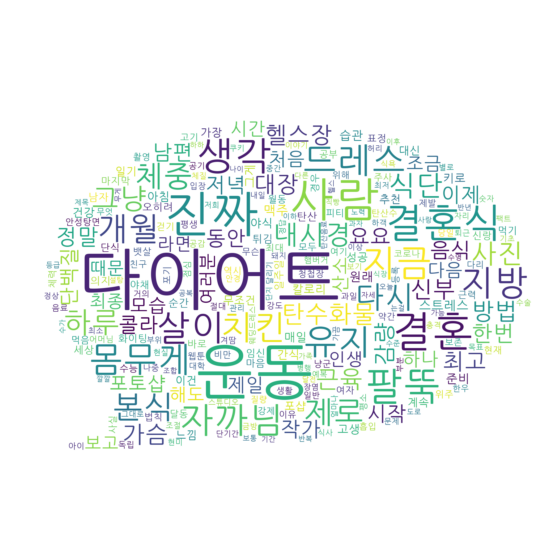

In [21]:
# ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î°ú ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÎßåÎì†Îã§.
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=250,
    max_words=250,
    mask=mask
).generate_from_frequencies(data) # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎßåÎì¶
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()